<a href="https://colab.research.google.com/github/ANLGBOY/MADE-with-PyTorch/blob/master/notebook/%5BAlgorithm%5D_Maximum_subarray_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum Subarray Problem
- Problem: Find the contiguous subarray of A whose values have the maximum sum (A[i] + ... + A[j])

In [ ]:
import numpy as np
import time

ARR_SIZE = 400

# The range of elements in arr_rand: [-10, 10]
arr_rand = np.random.randint(21, size=ARR_SIZE) - 10
print(arr_rand)

[ -6  -9  -2   8  -9   2  -2  -6  -8  -7  -4  -7   5 -10   2   1 -10  -7
 -10  -9  -1  -6   2  10   6   4  10  -3 -10  -3   7  -6   5   5   6   9
   3  -4   2  -9   5   5   8   7  -4   6   3   5  -5  -6   3   6   7   8
  -3  -8  -1  -9  -8   6  -7  -7   3  -9   1  -2  -6  -1  -7  -3  10   6
  -8   5   8   0   9   4 -10  -4   5   7   4   2   4  -5   5  -3   5  -9
   5  -7  -2  -4   9   4   6   0   6   3  -1   7   4  -3   7   4  -8   8
  -8  -4   5  -3  -3   8   4   3  10  -3  -4   1   0  -5  -8   9  -1  -4
  -4  -4   4  -6  -3  10  -6  -7  -6  -7   9  -2   3   3   6  -6   5  -4
   3 -10  -5   4  -4   7 -10   4 -10   1   0  -1 -10   9   0  -4   5   8
  -1   6  10   7  -3   5  -4  -7   7   9   0   7  -3   0  -3  -2   7   0
  10   8  -6   7  -3  -8   8  -4  -4  -9  -8  -1   1   3   7   5  -8  -3
   6 -10   6  -1   4  -9  -8   8   0   3  -9  -6 -10   0  -4   4  -2  -2
  -7   0  -4  -1  -3  -2   4   5   6  -9   5   6  -8  -8   7  -2   7   8
   3  -9  10  -4  -3  -6   9   2   1  -1 -10  10   

## 1. Brute force (1)
 - O(n^3)
 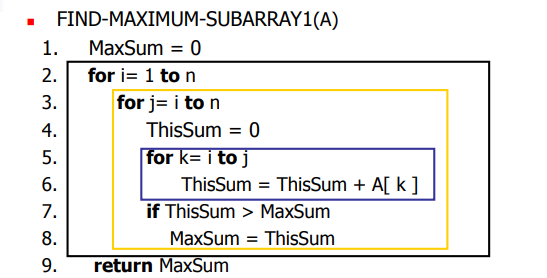

In [ ]:
max_sum = 0
timestamp = time.time()
for i in range(ARR_SIZE):
    for j in range(i, ARR_SIZE):
        sum = 0
        for k in range(i, j + 1):
            sum += arr_rand[k]

        if sum > max_sum:
            max_sum = sum

print('Total time:', time.time() - timestamp)
print('Max sum:', max_sum)

Total time: 3.3906335830688477
Max sum: 217


## 2. Brute force (2)
 - O(n^2)
 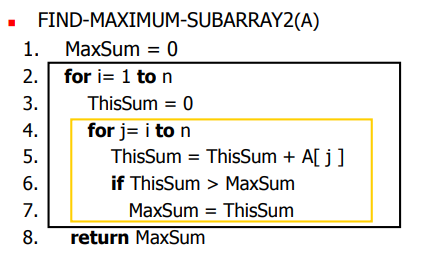

In [ ]:
max_sum = 0
timestamp = time.time()

for i in range(ARR_SIZE):
    sum = 0
    for j in range(i, ARR_SIZE):
        sum += arr_rand[j]
        if sum > max_sum:
            max_sum = sum

print('Total time:', time.time() - timestamp)
print('Max sum:', max_sum)


Total time: 0.03260397911071777
Max sum: 217


## 3. Devide and conquer
- O(nlogn)

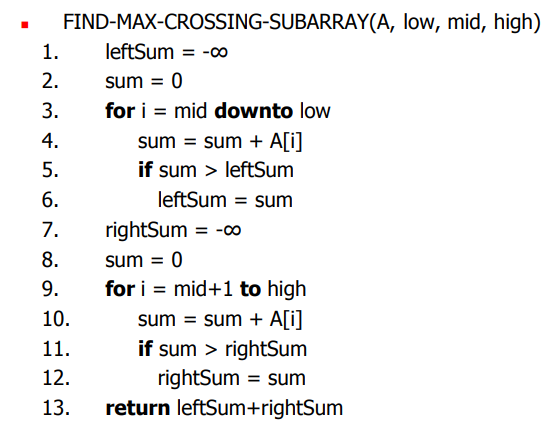

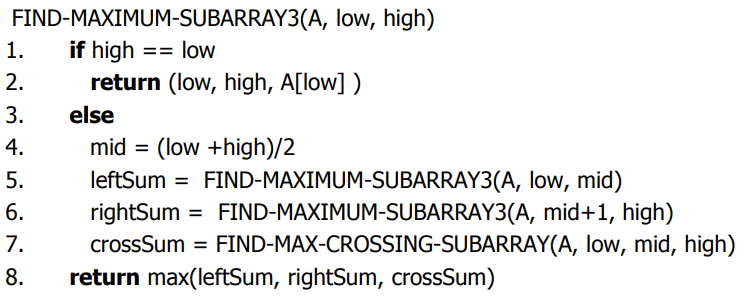

In [ ]:
timestamp = time.time()

def find_max_crossing_subarray(arr):
    idx_mid = len(arr) // 2
    max_left = max_right = sum_left = sum_right = 0
    
    for i in reversed(range(idx_mid)):
        sum_left += arr[i]
        if sum_left > max_left:
            max_left = sum_left

    for i in range(idx_mid, len(arr)):
        sum_right += arr[i]
        if sum_right > max_right:
            max_right = sum_right

    return max_left + max_right


def find_max_subarray(arr):
    if len(arr) == 1:
        return arr[0]

    idx_mid = len(arr) // 2

    sum_left = find_max_subarray(arr[:idx_mid])
    sum_right = find_max_subarray(arr[idx_mid:])
    sum_cross = find_max_crossing_subarray(arr)

    return max(sum_left, sum_right, sum_cross)


max_sum = find_max_subarray(arr_rand)

print('Total time:', time.time() - timestamp)
print('Max sum:', max_sum)

Total time: 0.0025119781494140625
Max sum: 217


## 4. Incremental search
- O(n)

In [ ]:
timestamp = time.time()

max_sum = 0
sum = 0

for i in range(len(arr_rand)):
    sum += arr_rand[i]
    if sum > max_sum:
        max_sum = sum
    elif sum < 0:
        sum = 0

print('Total time:', time.time() - timestamp)
print('Max sum:', max_sum)

Total time: 0.000324249267578125
Max sum: 217
